In [103]:
from scipy.io import wavfile 
capstone_dir = "/Users/ninismacbook/other_docs/Y4S1+S2/capstone" 
import matplotlib.pyplot as plt; import numpy as np; import pandas as pd ; import librosa
import librosa.display # Must have
from dtw import dtw;

In [104]:
num_of_mfcc = 13

In [105]:
def downsample(query, ratio):
    
    # Scale the amplitudes by dividing each amplitude over the largest amplitude magnitude
    max_m = np.abs(max(query))
    res = []
    for i in range(int(len(query) // ratio)):
        if int(i*ratio) < len(query):
            res.append(query[int(i*ratio)]/max_m)
    return res

# purely speaking

(13, 101)


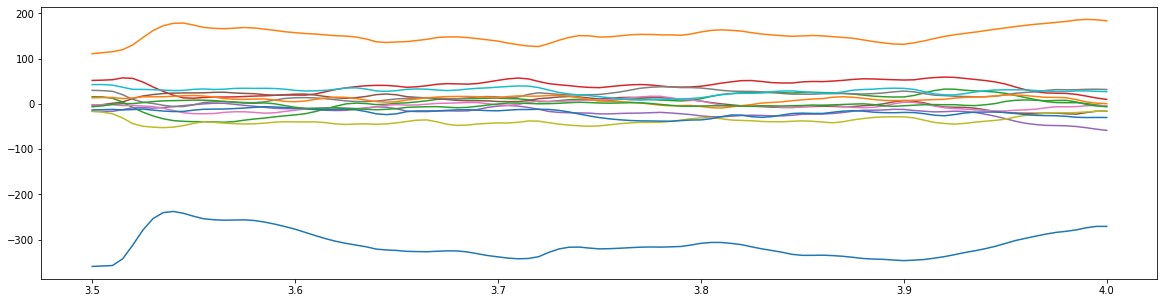

In [106]:
file1, seg1_1, seg1_2 = "01.wav", 3.5, 4

x, sr1 = librosa.load(capstone_dir + "/py_converted/" + file1, sr=None)

fragment_x = x[int(sr1*seg1_1): int(sr1*seg1_2)]
hop_len_in_s = 0.005

mfcc1 = librosa.feature.mfcc(fragment_x, sr1, n_mfcc=num_of_mfcc, hop_length=int(hop_len_in_s*sr1))
print(mfcc1.shape) 
# for i in range(len(mfcc1)):
#     print(i)
#     print(mfcc1[i])
    
time1 = np.linspace(seg1_1, seg1_2, num = mfcc1.shape[1])
    
plt.figure(figsize=(20, 5))
for i in mfcc1:
    plt.plot(time1, i);    

# purely pause

(13, 201)
336.6229


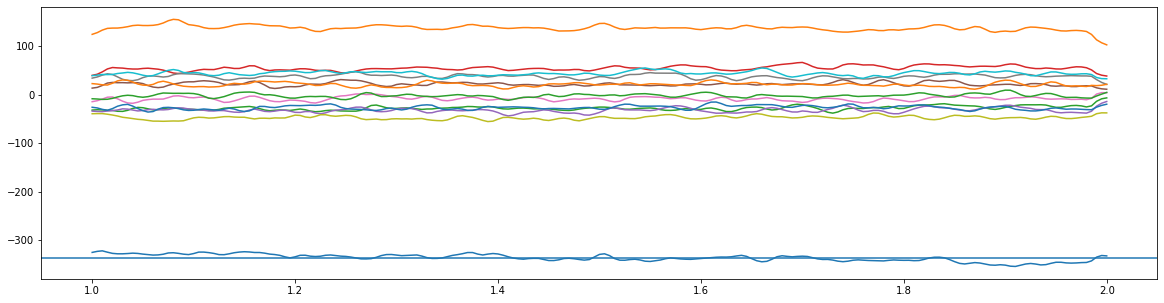

In [107]:
file1, seg1_1, seg1_2 = "01.wav", 1, 2

x, sr1 = librosa.load(capstone_dir + "/py_converted/" + file1, sr=None)

fragment_x = x[int(sr1*seg1_1): int(sr1*seg1_2)]
hop_len_in_s = 0.005

mfcc1 = librosa.feature.mfcc(fragment_x, sr1, n_mfcc=num_of_mfcc, hop_length=int(hop_len_in_s*sr1))
print(mfcc1.shape) 
# for i in range(len(mfcc1)):
#     print(i)
#     print(mfcc1[i])
    
time1 = np.linspace(seg1_1, seg1_2, num = mfcc1.shape[1])
    
plt.figure(figsize=(20, 5))
for i in mfcc1:
    plt.plot(time1, i);    
    
    
threshold = np.mean(np.abs(mfcc1[0]))
print(threshold)
plt.axhline(y = -threshold)    

# transitioning from pause to speak

(13, 141)


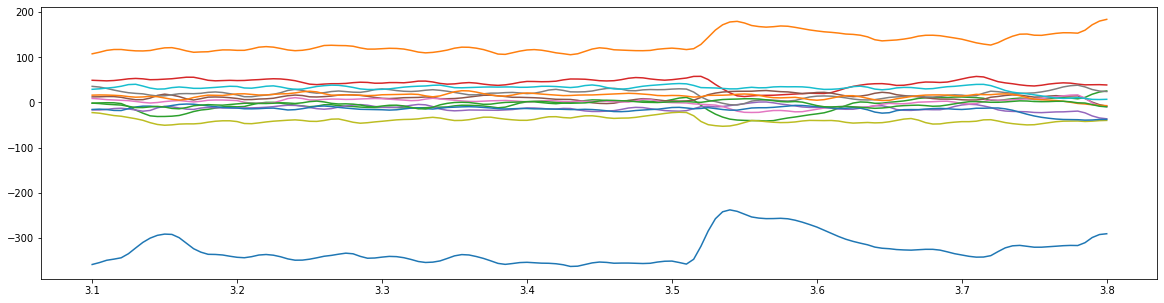

In [108]:
file1, seg1_1, seg1_2 = "01.wav", 3.1, 3.8

x, sr1 = librosa.load(capstone_dir + "/py_converted/" + file1, sr=None)

fragment_x = x[int(sr1*seg1_1): int(sr1*seg1_2)]
hop_len_in_s = 0.005

mfcc1 = librosa.feature.mfcc(fragment_x, sr1, n_mfcc=num_of_mfcc, hop_length=int(hop_len_in_s*sr1))
print(mfcc1.shape) 

time1 = np.linspace(seg1_1, seg1_2, num = mfcc1.shape[1])
    
plt.figure(figsize=(20, 5))
for i in mfcc1:
    plt.plot(time1, i);    

# transitioning from speak to pause (pause at 34.53, the peak is "t" )

(13, 450)


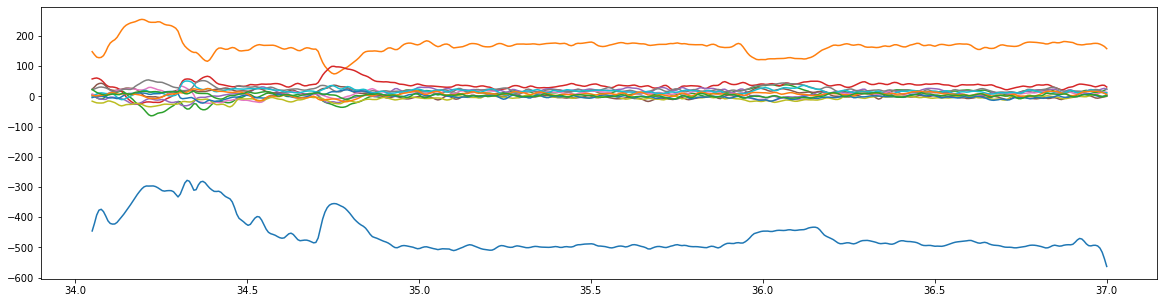

In [109]:
file1, seg1_1, seg1_2 = "01.wav", 34.05, 37

x, sr1 = librosa.load(capstone_dir + "/py_converted/" + file1, sr=None)

fragment_x = x[int(sr1*seg1_1): int(sr1*seg1_2)]
hop_len_in_s = 0.005

mfcc1 = librosa.feature.mfcc(fragment_x, sr1, n_mfcc=num_of_mfcc, hop_length=int(hop_len_in_s*sr1))
print(mfcc1.shape) 
# for i in range(len(mfcc1)):
#     print(i)
#     print(mfcc1[i])

time1 = np.linspace(seg1_1, seg1_2, num = mfcc1.shape[1])
    
plt.figure(figsize=(20, 5))
for i in mfcc1:
    plt.plot(time1, i);  

# speech to pause to speech

(13, 522)


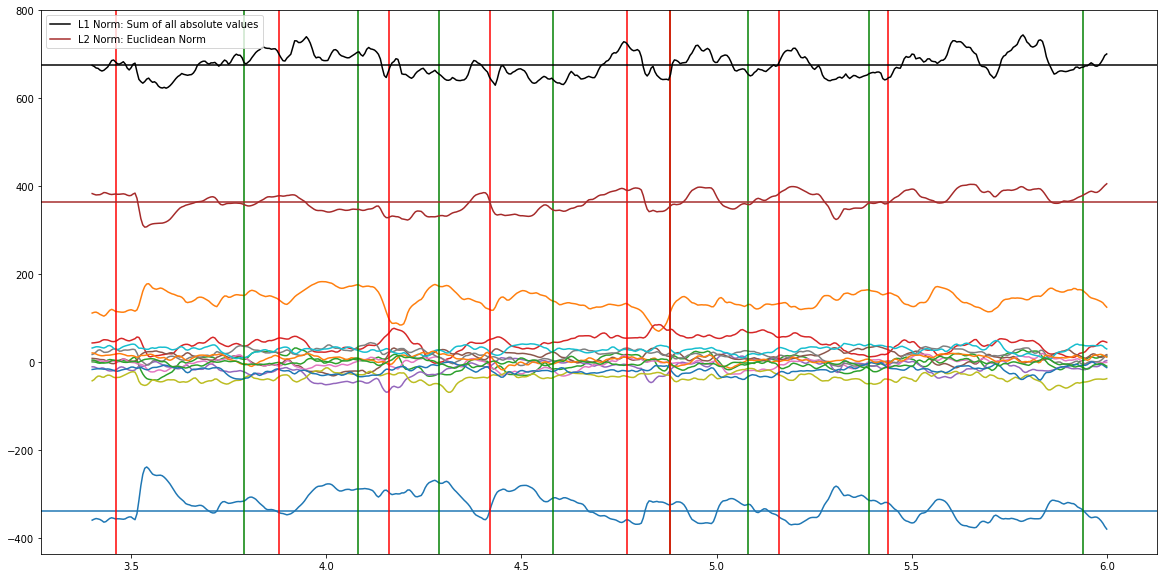

In [110]:
file1, seg1_1, seg1_2 = "01.wav", 3.4, 6
time1_lst = [3.46, 3.88, 4.16, 4.42, 4.77, 4.88, 5.16, 5.44] 
time1_lst2 = [3.79, 4.08, 4.29, 4.58, 4.88, 5.08, 5.39, 5.94]

x, sr1 = librosa.load(capstone_dir + "/py_converted/" + file1, sr=None)

fragment_x = x[int(sr1*seg1_1): int(sr1*seg1_2)]
hop_len_in_s = 0.005

mfcc1 = librosa.feature.mfcc(fragment_x, sr1, n_mfcc=num_of_mfcc, hop_length=int(hop_len_in_s*sr1))
print(mfcc1.shape) 

time1 = np.linspace(seg1_1, seg1_2, num = mfcc1.shape[1])
    
plt.figure(figsize=(20, 10))
for i in mfcc1:
    plt.plot(time1, i);  
    
plt.axhline(y = -threshold)
for i in range(len(time1_lst)):
    plt.axvline(time1_lst[i], color = 'red')
    plt.axvline(time1_lst2[i], color = 'green')
    
L1 = np.zeros(mfcc1.shape[1])
for k in range(len(mfcc1)):
    L1 = L1 + np.abs(mfcc1[k])

plt.plot(time1, L1, color = 'black', label = 'L1 Norm: Sum of all absolute values')
L1_mean = np.mean(L1)
plt.axhline(y = L1_mean, color = 'black');

L2 = np.zeros(mfcc1.shape[1])
for k in range(len(mfcc1)):
    L2 = L2 + mfcc1[k]**2
    
L2 = np.sqrt(L2)
plt.plot(time1, L2, color = 'brown', label = 'L2 Norm: Euclidean Norm')
L2_mean = np.mean(L2)
plt.axhline(y = L2_mean, color = 'brown');

plt.legend();

# test

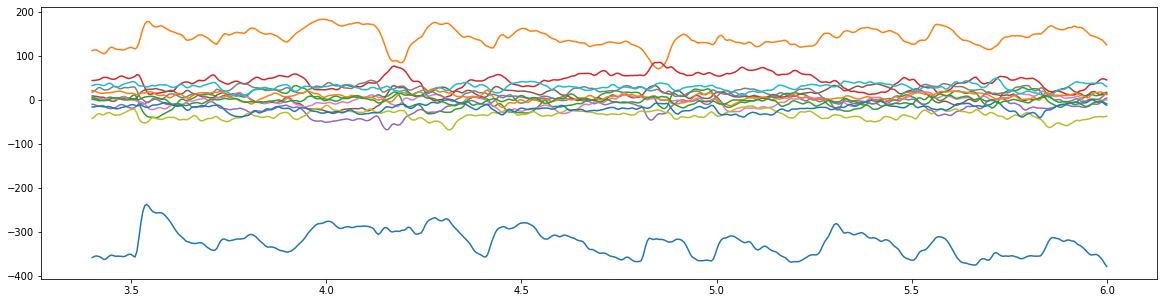

<Figure size 1440x360 with 0 Axes>

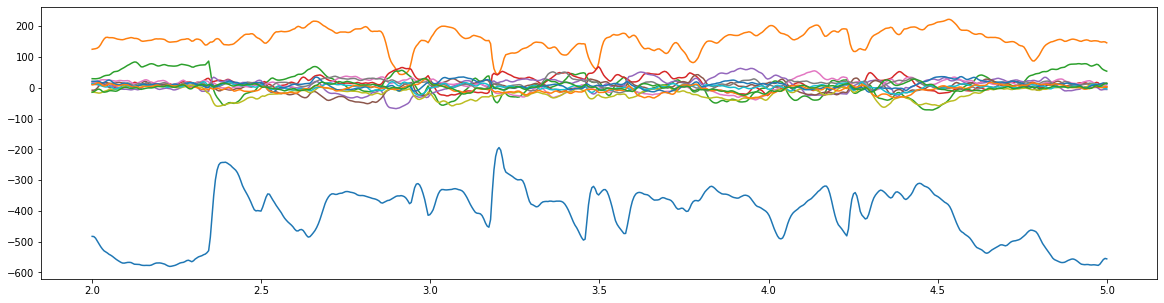

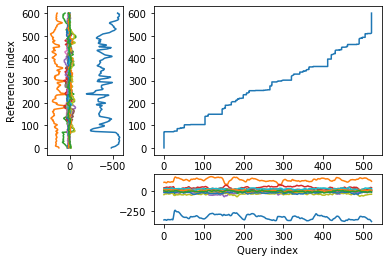

In [111]:
file1, seg1_1, seg1_2 = "01.wav", 3.4, 6
file2, seg2_1, seg2_2 = "01_1.wav", 2, 5

x, sr1 = librosa.load(capstone_dir + "/py_converted/" + file1, sr=None)
y, sr2 = librosa.load(capstone_dir + "/py_converted/" + file2, sr=None)

fragment_x = x[int(sr1*seg1_1): int(sr1*seg1_2)]
fragment_y = y[int(sr2*seg2_1): int(sr2*seg2_2)]

# number of mfcc frames = audio length * samplerate / hop length (default = 512)
# set hop_length = __ s
hop_len_in_s = 0.005

mfcc1 = librosa.feature.mfcc(fragment_x, sr1, n_mfcc=num_of_mfcc, hop_length=int(hop_len_in_s*sr1))
mfcc2 = librosa.feature.mfcc(fragment_y, sr2, n_mfcc=num_of_mfcc, hop_length=int(hop_len_in_s*sr2))

time1 = np.linspace(seg1_1, seg1_2, num = mfcc1.shape[1])
plt.figure(figsize=(20, 5))
for i in mfcc1:
    plt.plot(time1, i);  
    
plt.figure(figsize=(20, 5))
time2 = np.linspace(seg2_1, seg2_2, num = mfcc2.shape[1])
plt.figure(figsize=(20, 5))
for i in mfcc2:
    plt.plot(time2, i);   

alignment = dtw(mfcc1.T, mfcc2.T, keep_internals=True)
alignment.plot(type="threeway");
# print('distance: ', alignment.distance)
# plt.figure(figsize=(20, 5))
# plt.plot(time1, mfcc1[0])

# Everything together - 13 MFCCs

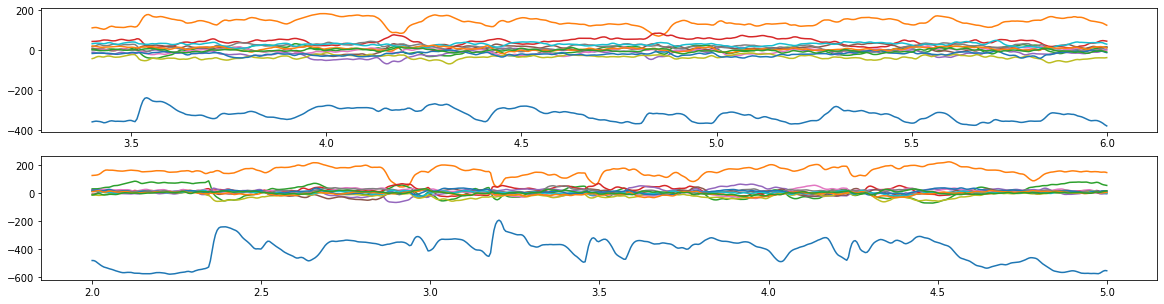

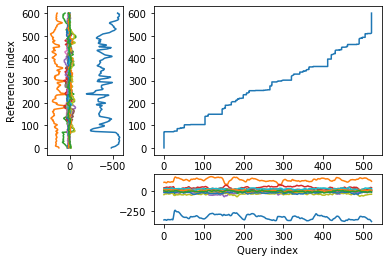

threshold 1:  340
threshold 2:  470


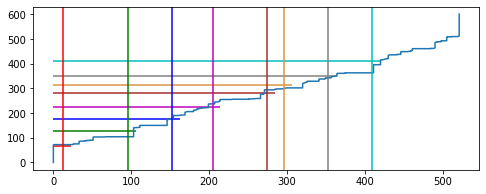

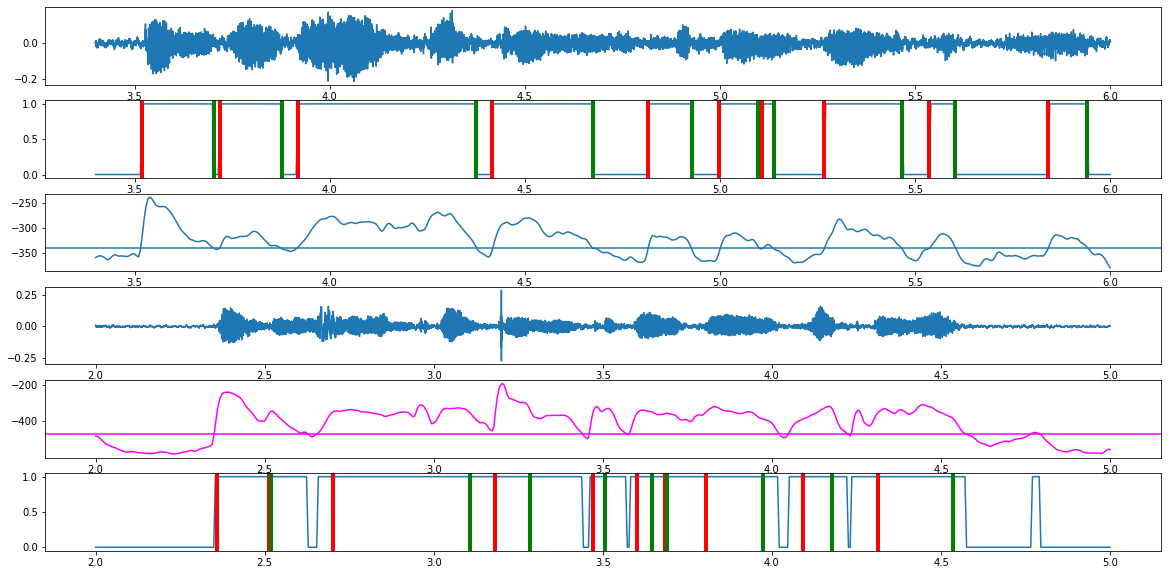

In [120]:
def output(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, *args, **kwargs):
    
    threshold1 = kwargs.get('threshold1', None)
    threshold2 = kwargs.get('threshold2', None)
    time1_lst = kwargs.get('time1_lst', None)
    time2_lst = kwargs.get('time2_lst', None)   

    x, sr1 = librosa.load(capstone_dir + "/py_converted/" + file1, sr=None)
    y, sr2 = librosa.load(capstone_dir + "/py_converted/" + file2, sr=None)

    fragment_x = x[int(sr1*seg1_1): int(sr1*seg1_2)]
    fragment_y = y[int(sr2*seg2_1): int(sr2*seg2_2)]

    # number of mfcc frames = audio length * samplerate / hop length (default = 512)
    # set hop_length = __ s
    hop_len_in_s = 0.005

    mfcc1 = librosa.feature.mfcc(fragment_x, sr1, n_mfcc=num_of_mfcc, hop_length=int(hop_len_in_s*sr1))
    mfcc2 = librosa.feature.mfcc(fragment_y, sr2, n_mfcc=num_of_mfcc, hop_length=int(hop_len_in_s*sr2))

    fig, (ax1, ax2) = plt.subplots(2, 1); fig.set_size_inches(20, 5)             
    time1 = np.linspace(seg1_1, seg1_2, num = mfcc1.shape[1])
    for i in mfcc1:
        ax1.plot(time1, i);  

    time2 = np.linspace(seg2_1, seg2_2, num = mfcc2.shape[1])
    for i in mfcc2:
        ax2.plot(time2, i);   

    dtw_input1 = mfcc1.T
    dtw_input2 = mfcc2.T
    alignment = dtw(dtw_input1, dtw_input2, keep_internals=True)
    alignment.plot(type="threeway");
#     print('distance: ', alignment.distance)

    if not threshold1:
        x_threshold = x[int(sr1*1): int(sr1*2)]
        x_mfcc_threshold = librosa.feature.mfcc(x_threshold, sr1, n_mfcc=num_of_mfcc, hop_length=int(hop_len_in_s*sr1))        
        threshold1 = np.mean(np.abs(x_mfcc_threshold[0]))        
        
    if not threshold2:
        y_threshold = y[int(sr2*1): int(sr2*2)]
        y_mfcc_threshold = librosa.feature.mfcc(y_threshold, sr2, n_mfcc=num_of_mfcc, hop_length=int(hop_len_in_s*sr2))
        threshold2 = np.mean(np.abs(y_mfcc_threshold[0]))

    print('threshold 1: ', threshold1)
    print('threshold 2: ', threshold2)    
    
    if time1_lst and time2_lst:
        plt.figure(figsize=(8, 3))
        plt.plot(alignment.index1, alignment.index2)
        time1_2 = (np.array(time1_lst) - seg1_1)*sr1/int(hop_len_in_s*sr1)
        time2_2 = (np.array(time2_lst) - seg2_1)*sr2/int(hop_len_in_s*sr2)

        colors = ['red', 'g', 'b', 'm', 'brown', '#d89743', 'grey', 'c', 'orange', 'g', 'b', 'm', 'red']

        for i in range(len(time1_2)):
            x_axis, y_axis = time1_2[i], time2_2[i]
            plt.axvline(x_axis, color = colors[i])
            plt.hlines(y_axis, 0, x_axis+10, color = colors[i]) 
            
    time1 = np.linspace(seg1_1, seg1_2, num = mfcc1.shape[1])
    speech_x = []
    for i in range(mfcc1.shape[1]):
        if mfcc1[0][i] > -threshold1:
            speech_x.append(1)
        else:
            speech_x.append(0)

    speech_y = []
    for i in range(mfcc2.shape[1]):
        if mfcc2[0][i] > -threshold2:
            speech_y.append(1)
        else:
            speech_y.append(0)   
    
    xs = alignment.index1
    ys = alignment.index2
    
    common_arr = [0] # multiplication of speech indicator of the input speech indicator functions
    common_seg = {} # store the list of speech and pause segments
    plt_index = {}    
    
    alignment_len = len(alignment.index1)
    for i in range(1, alignment_len):        
        sp1 = speech_x[xs[i]]
        sp2 = speech_y[ys[i]]
        sp_now = sp1*sp2

        if common_arr[-1] == 0 and sp_now == 1:
            # start of an aligned speech segment 
            plt_index['index in curve ' + str(i) + ' speech starts'] = [xs[i], ys[i]]

        elif common_arr[-1] == 1 and sp_now == 0:
            # end of aligned speech segment / start of an aligned pause segment
            plt_index['index in curve ' + str(i) + ' pause starts'] = [xs[i], ys[i]]          

        common_arr.append(sp_now)

    # Initialize matrix based on common segmentation, calculated from common segmentation
    counter = 0
    for j in range(1, len(common_arr)):
        counter = counter + 1
        if common_arr[j-1] == 0 and common_arr[j] == 1:
            common_seg[counter] = 'speech'
        if common_arr[j-1] == 1 and common_arr[j] == 0:
            common_seg[counter] = 'pause'        
            
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1); fig.set_size_inches(20, 10)

    time = np.linspace(seg1_1, seg1_2, num = len(fragment_x))
    ax1.plot(time, fragment_x)
    ax2.plot(time1, speech_x)
    ax3.plot(time1, mfcc1[0])   
    ax3.axhline(y = -threshold1)      

    time = np.linspace(seg2_1, seg2_2, num = len(fragment_y))
    ax4.plot(time, fragment_y)
    time2 = np.linspace(seg2_1, seg2_2, num = mfcc2.shape[1])
    ax5.plot(time2, mfcc2[0], color = 'magenta')
    ax5.axhline(y = -threshold2, color = 'magenta') 
    ax6.plot(time2, speech_y)                   
  
    common_seg = list(plt_index.values())

#     print(mfcc1.shape, mfcc2.shape)
#     print(len(speech_x), len(speech_y))
    len1 = len(speech_x)
    to_plot = [i[0] for i in common_seg]
        
    for k in range(len(to_plot)):
        if k % 2 == 0:
            c = 'red'
        else:
            c = 'green'
        ax2.axvline(to_plot[k]/len1*(time1[-1]-time1[0])+ time1[0], color = c, ymin=0, ymax=1, linewidth=4)  
        
        
    len2 = len(speech_y)    
    to_plot = [i[1] for i in common_seg]
        
    for k in range(len(to_plot)):
        if k % 2 == 0:
            c = 'red'
        else:
            c = 'green'
            
        ax6.axvline(to_plot[k]/len2*(time2[-1]-time2[0])+ time2[0], color = c, ymin=0, ymax=1, linewidth=4)    

        
file1, seg1_1, seg1_2 = "01.wav", 3.4, 6
file2, seg2_1, seg2_2 = "01_1.wav", 2, 5

time1_lst = [3.46, 3.88, 4.16, 4.42, 4.77, 4.88, 5.16, 5.44] 
time2_lst = [2.33, 2.63, 2.87, 3.12, 3.40, 3.57, 3.74, 4.06]    
output(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, time1_lst = time1_lst, time2_lst = time2_lst, 
       threshold1 = 340, threshold2 = 470) ;

 

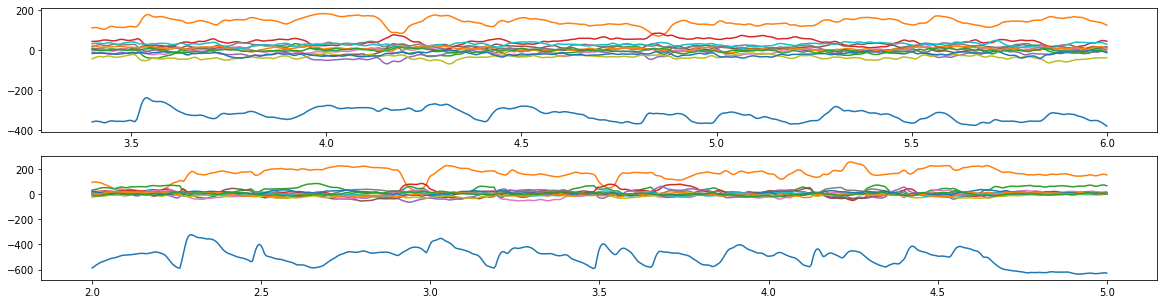

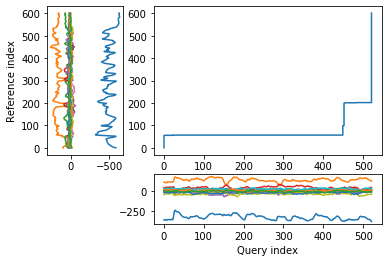

threshold 1:  336.6229
threshold 2:  593.9551


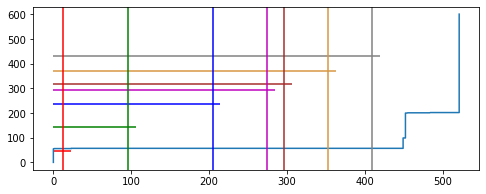

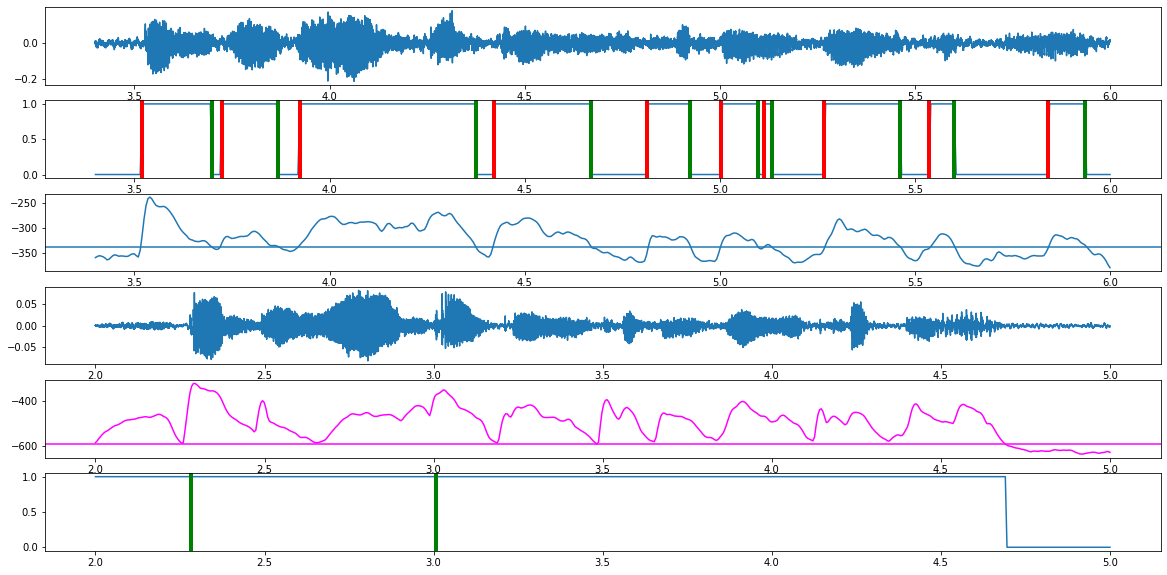

In [122]:
file1, seg1_1, seg1_2 = "01.wav", 3.4, 6
file2, seg2_1, seg2_2 = "01_2.wav", 2, 5

time1_lst = [3.46, 3.88, 4.42, 4.77, 4.88, 5.16, 5.44] ;
time2_lst = [2.24, 2.72, 3.18, 3.46, 3.59, 3.84, 4.16]

output(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, time1_lst = time1_lst, time2_lst = time2_lst)

# 1 mfcc

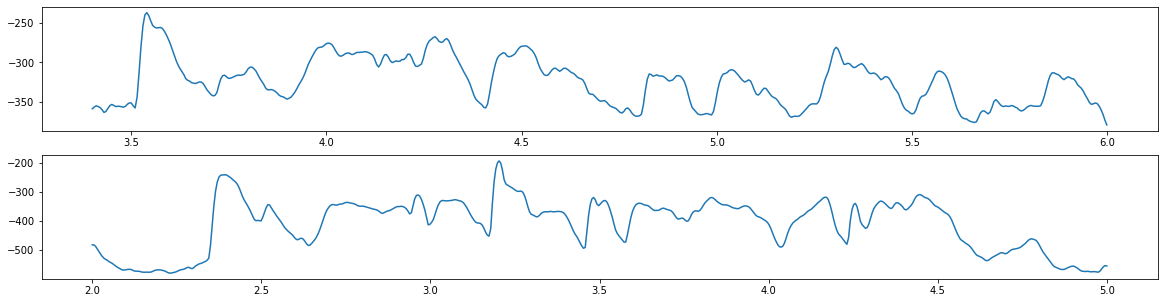

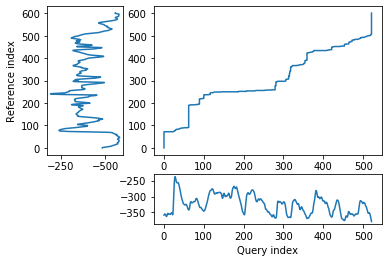

threshold 1:  340
threshold 2:  470


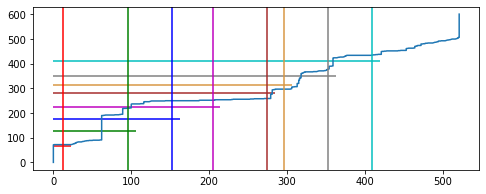

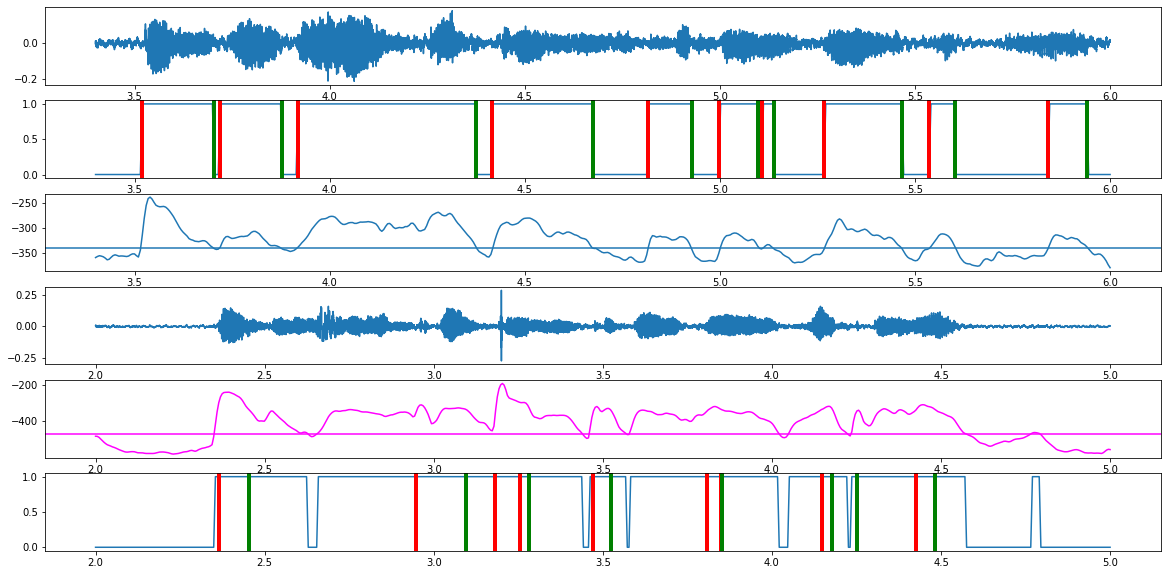

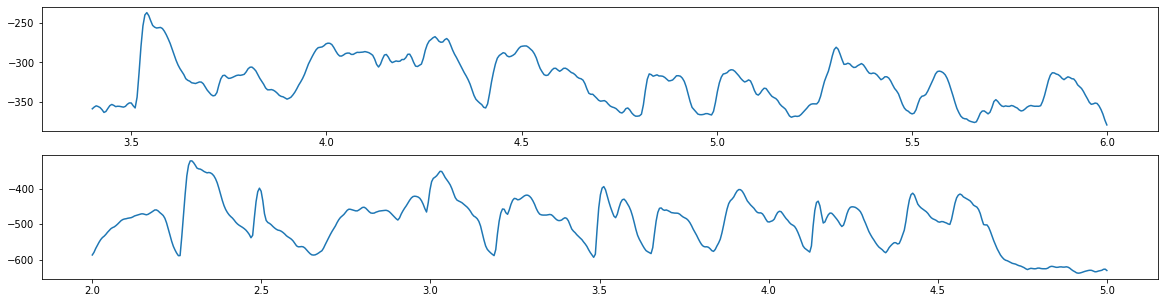

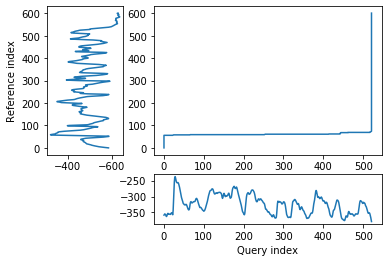

threshold 1:  336.6229
threshold 2:  593.9551


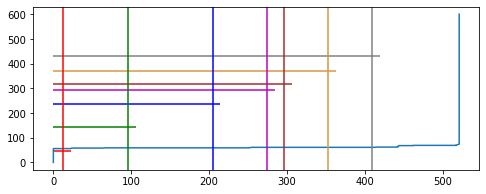

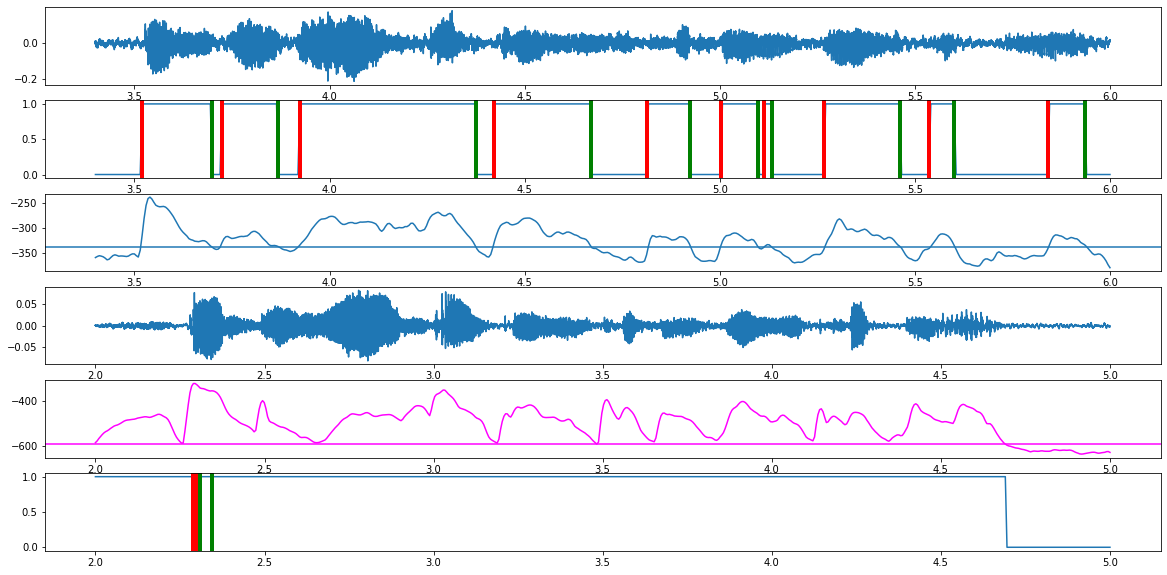

In [123]:
num_of_mfcc = 1

file1, seg1_1, seg1_2 = "01.wav", 3.4, 6
file2, seg2_1, seg2_2 = "01_1.wav", 2, 5

time1_lst = [3.46, 3.88, 4.16, 4.42, 4.77, 4.88, 5.16, 5.44] 
time2_lst = [2.33, 2.63, 2.87, 3.12, 3.40, 3.57, 3.74, 4.06]    
output(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, time1_lst = time1_lst, time2_lst = time2_lst, 
       threshold1 = 340, threshold2 = 470) ;

file1, seg1_1, seg1_2 = "01.wav", 3.4, 6
file2, seg2_1, seg2_2 = "01_2.wav", 2, 5

time1_lst = [3.46, 3.88, 4.42, 4.77, 4.88, 5.16, 5.44] ;
time2_lst = [2.24, 2.72, 3.18, 3.46, 3.59, 3.84, 4.16]

output(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, time1_lst = time1_lst, time2_lst = time2_lst)

# 20 mfcc

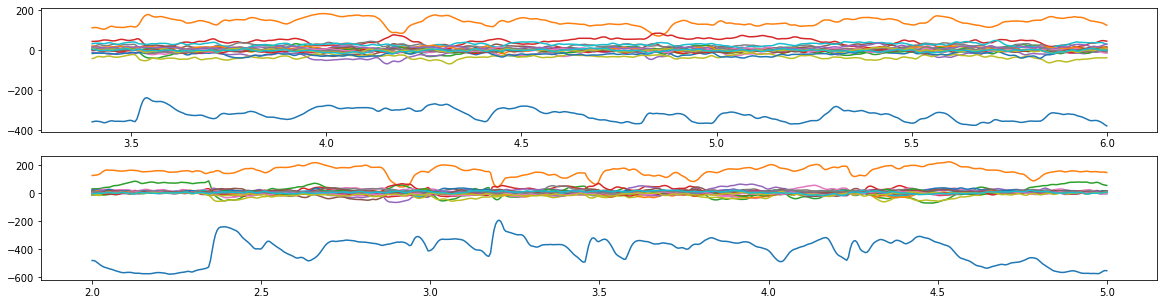

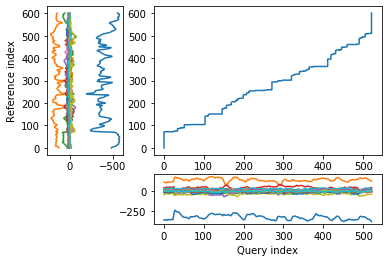

threshold 1:  340
threshold 2:  470


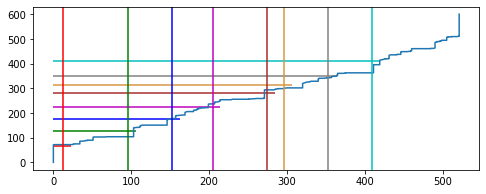

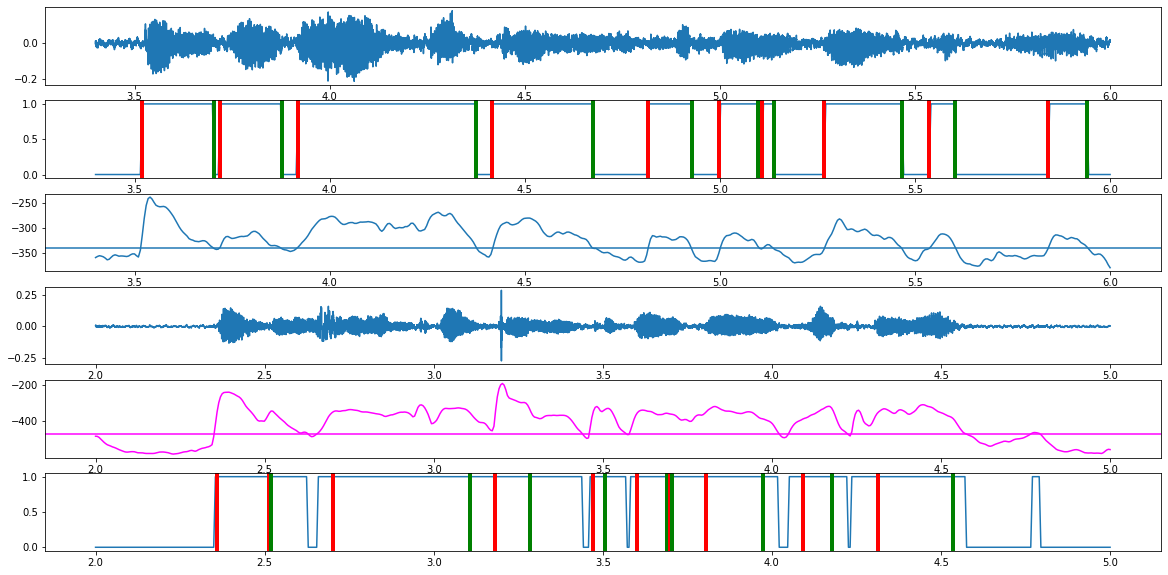

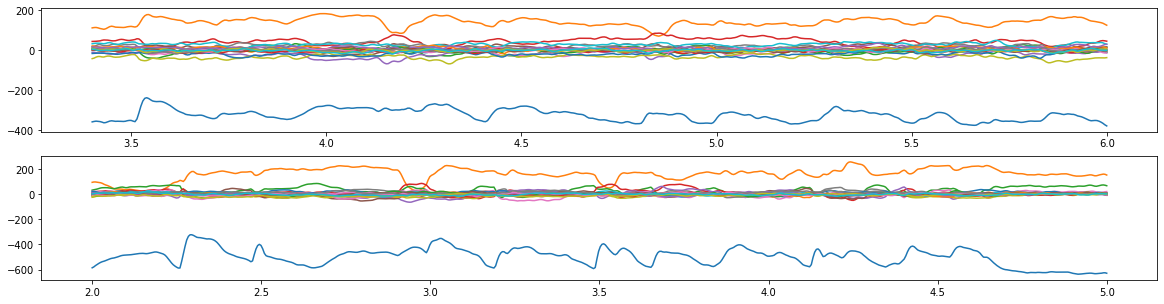

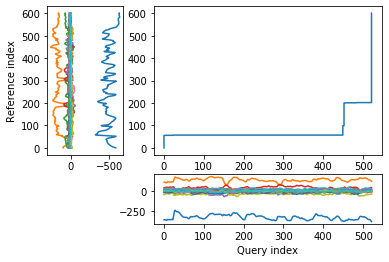

threshold 1:  336.6229
threshold 2:  593.9551


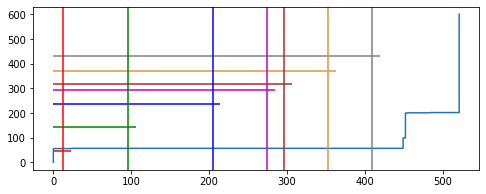

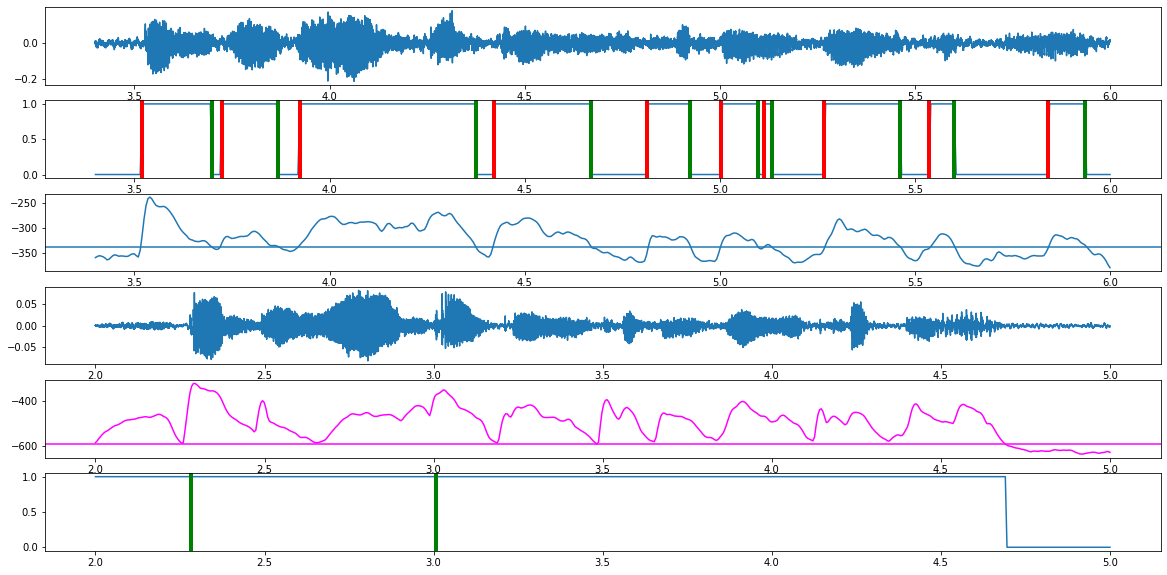

In [89]:
num_of_mfcc = 20

file1, seg1_1, seg1_2 = "01.wav", 3.4, 6
file2, seg2_1, seg2_2 = "01_1.wav", 2, 5

time1_lst = [3.46, 3.88, 4.16, 4.42, 4.77, 4.88, 5.16, 5.44] 
time2_lst = [2.33, 2.63, 2.87, 3.12, 3.40, 3.57, 3.74, 4.06]    
output(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, time1_lst = time1_lst, time2_lst = time2_lst, 
       threshold1 = 340, threshold2 = 470) ;

file1, seg1_1, seg1_2 = "01.wav", 3.4, 6
file2, seg2_1, seg2_2 = "01_2.wav", 2, 5

time1_lst = [3.46, 3.88, 4.42, 4.77, 4.88, 5.16, 5.44] ;
time2_lst = [2.24, 2.72, 3.18, 3.46, 3.59, 3.84, 4.16]

output(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, time1_lst = time1_lst, time2_lst = time2_lst) 

# 5 mfcc

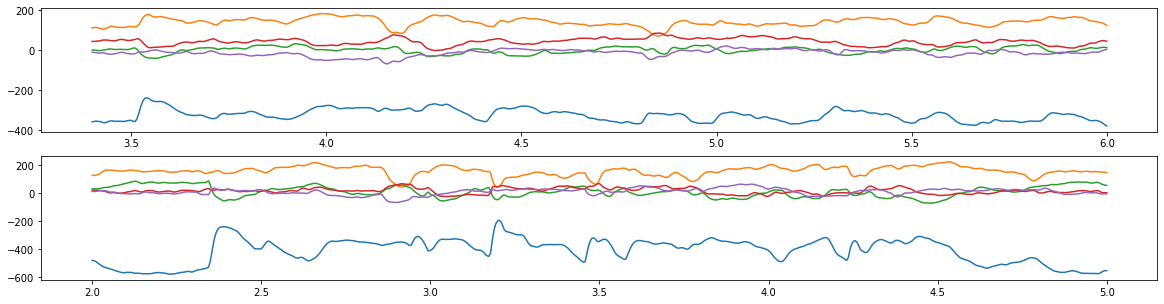

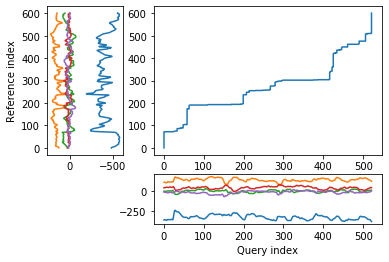

threshold 1:  340
threshold 2:  470


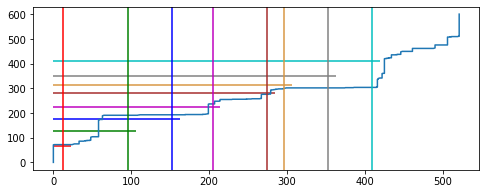

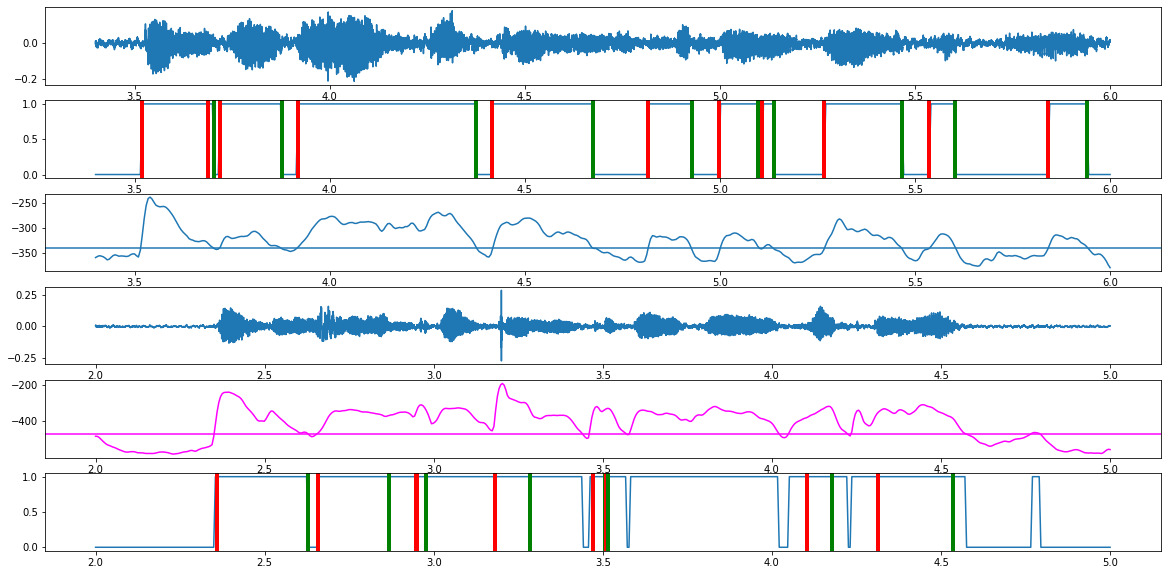

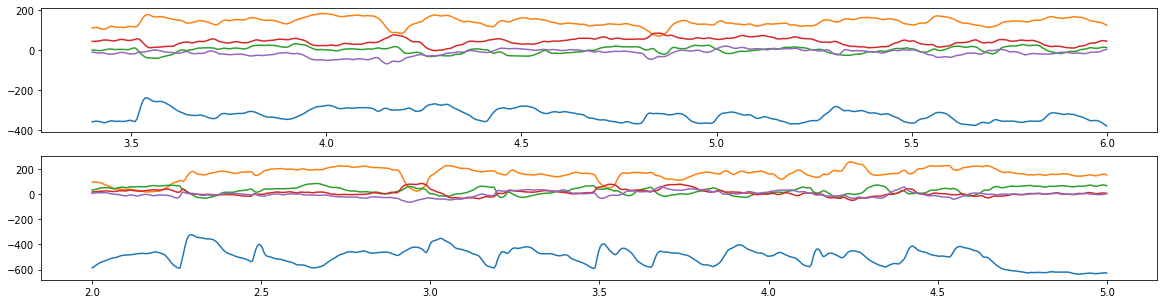

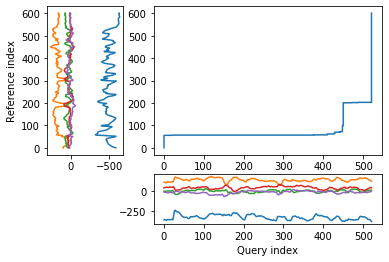

threshold 1:  336.6229
threshold 2:  500


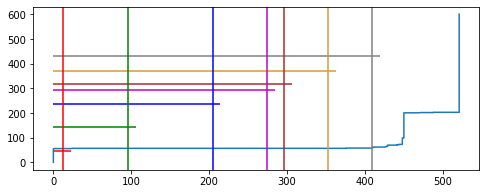

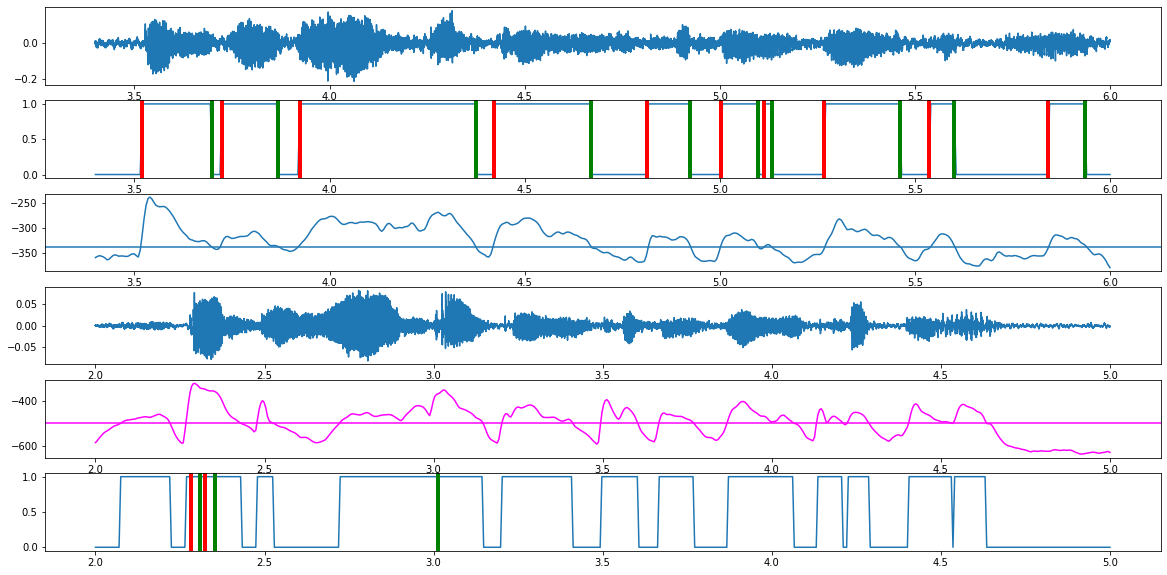

In [90]:
num_of_mfcc = 5

file1, seg1_1, seg1_2 = "01.wav", 3.4, 6
file2, seg2_1, seg2_2 = "01_1.wav", 2, 5

time1_lst = [3.46, 3.88, 4.16, 4.42, 4.77, 4.88, 5.16, 5.44] 
time2_lst = [2.33, 2.63, 2.87, 3.12, 3.40, 3.57, 3.74, 4.06]    
output(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, time1_lst = time1_lst, time2_lst = time2_lst, 
       threshold1 = 340, threshold2 = 470) ;


file1, seg1_1, seg1_2 = "01.wav", 3.4, 6
file2, seg2_1, seg2_2 = "01_2.wav", 2, 5

time1_lst = [3.46, 3.88, 4.42, 4.77, 4.88, 5.16, 5.44] ;
time2_lst = [2.24, 2.72, 3.18, 3.46, 3.59, 3.84, 4.16]

output(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, time1_lst = time1_lst, time2_lst = time2_lst, threshold2 = 500) 

# 50 mfcc

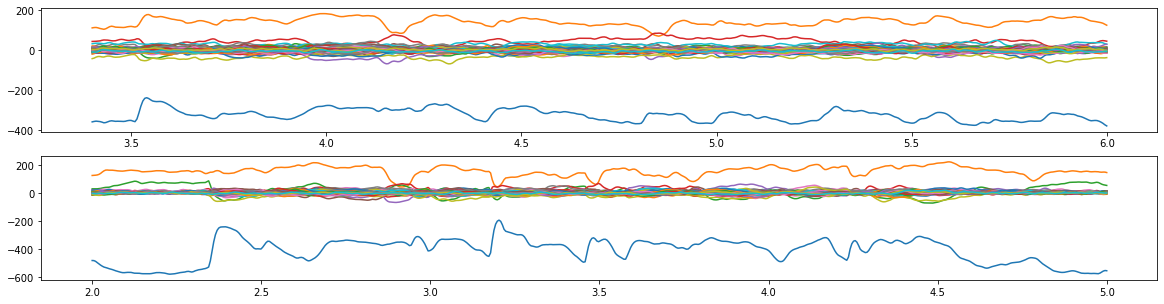

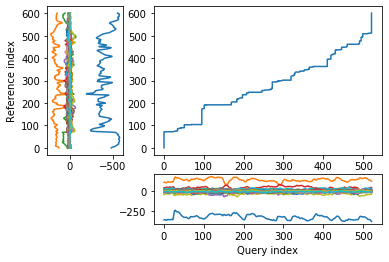

threshold 1:  340
threshold 2:  470


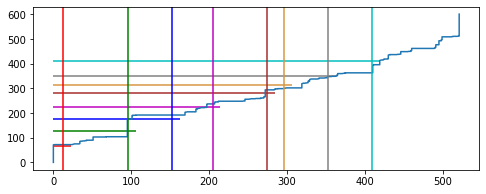

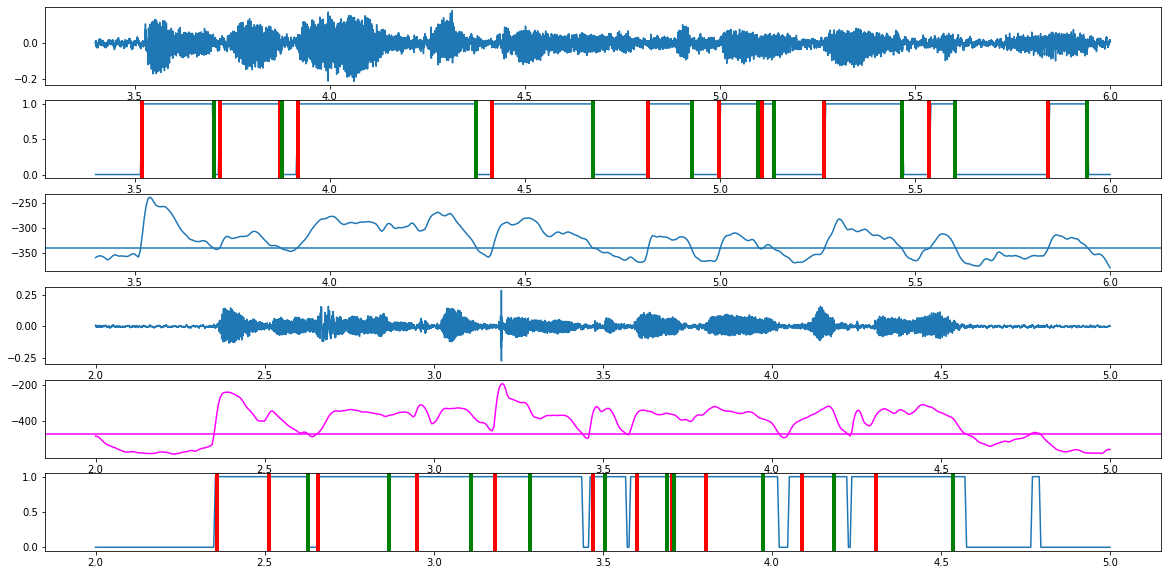

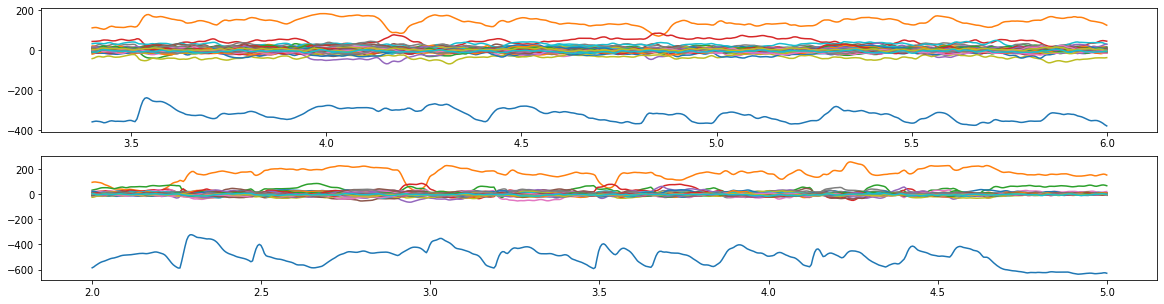

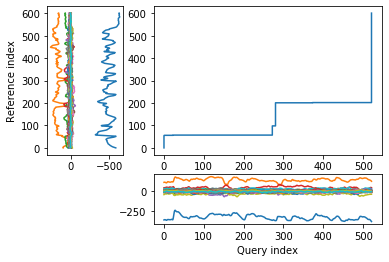

threshold 1:  336.6229
threshold 2:  500


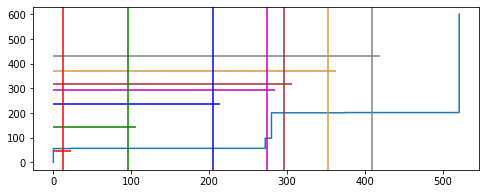

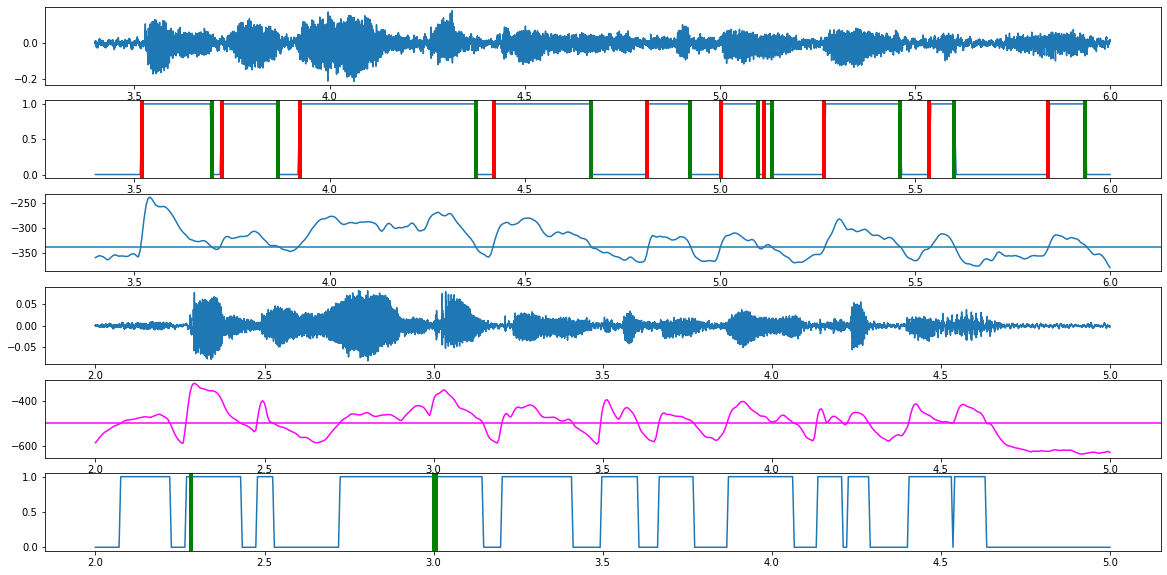

In [102]:
num_of_mfcc = 50

file1, seg1_1, seg1_2 = "01.wav", 3.4, 6
file2, seg2_1, seg2_2 = "01_1.wav", 2, 5

time1_lst = [3.46, 3.88, 4.16, 4.42, 4.77, 4.88, 5.16, 5.44] 
time2_lst = [2.33, 2.63, 2.87, 3.12, 3.40, 3.57, 3.74, 4.06]    
output(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, time1_lst = time1_lst, time2_lst = time2_lst, 
       threshold1 = 340, threshold2 = 470) ;


file1, seg1_1, seg1_2 = "01.wav", 3.4, 6
file2, seg2_1, seg2_2 = "01_2.wav", 2, 5

time1_lst = [3.46, 3.88, 4.42, 4.77, 4.88, 5.16, 5.44] ;
time2_lst = [2.24, 2.72, 3.18, 3.46, 3.59, 3.84, 4.16]

output(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, time1_lst = time1_lst, time2_lst = time2_lst, threshold2 = 500) 

# blue + orange

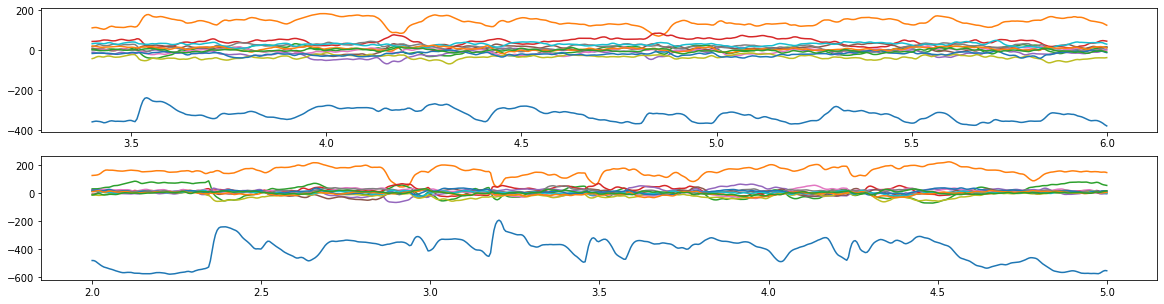

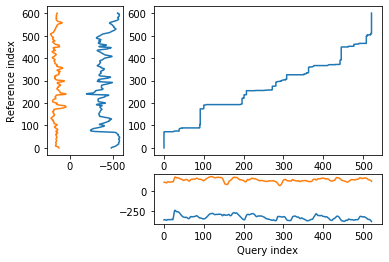

threshold 1:  340
threshold 2:  470


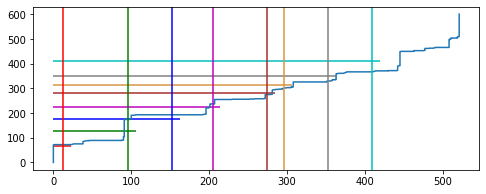

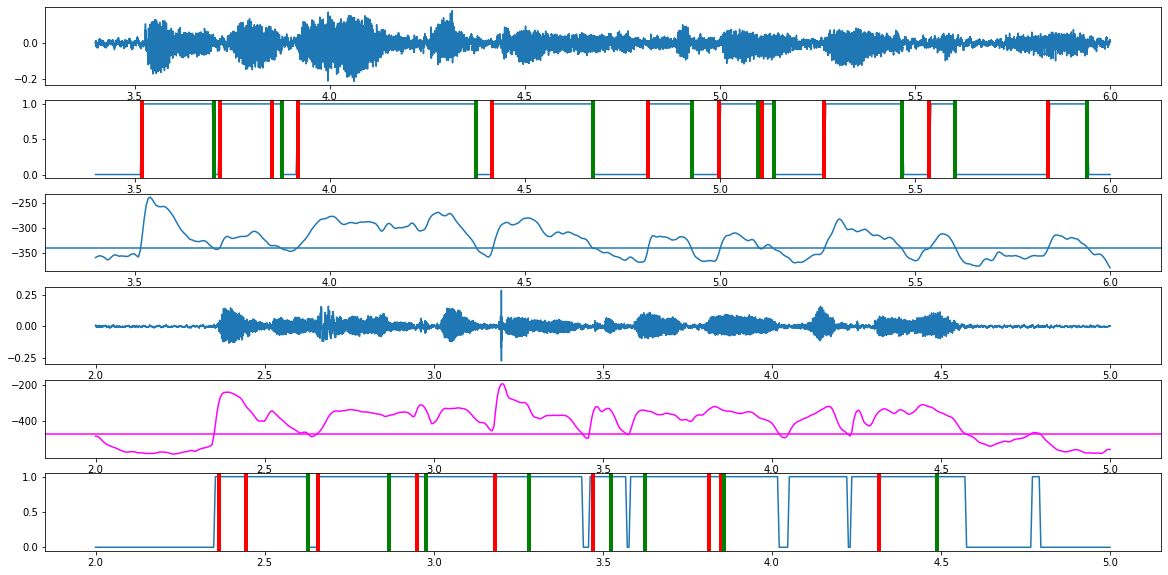

In [118]:
def output(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, *args, **kwargs):
    
    threshold1 = kwargs.get('threshold1', None)
    threshold2 = kwargs.get('threshold2', None)
    time1_lst = kwargs.get('time1_lst', None)
    time2_lst = kwargs.get('time2_lst', None)   

    x, sr1 = librosa.load(capstone_dir + "/py_converted/" + file1, sr=None)
    y, sr2 = librosa.load(capstone_dir + "/py_converted/" + file2, sr=None)

    fragment_x = x[int(sr1*seg1_1): int(sr1*seg1_2)]
    fragment_y = y[int(sr2*seg2_1): int(sr2*seg2_2)]

    # number of mfcc frames = audio length * samplerate / hop length (default = 512)
    # set hop_length = __ s
    hop_len_in_s = 0.005

    mfcc1 = librosa.feature.mfcc(fragment_x, sr1, n_mfcc=num_of_mfcc, hop_length=int(hop_len_in_s*sr1))
    mfcc2 = librosa.feature.mfcc(fragment_y, sr2, n_mfcc=num_of_mfcc, hop_length=int(hop_len_in_s*sr2))

    fig, (ax1, ax2) = plt.subplots(2, 1); fig.set_size_inches(20, 5)             
    time1 = np.linspace(seg1_1, seg1_2, num = mfcc1.shape[1])
    for i in mfcc1:
        ax1.plot(time1, i);  

    time2 = np.linspace(seg2_1, seg2_2, num = mfcc2.shape[1])
    for i in mfcc2:
        ax2.plot(time2, i);   

    dtw_input1 = mfcc1[0:2].T
    dtw_input2 = mfcc2[0:2].T
    alignment = dtw(dtw_input1, dtw_input2, keep_internals=True)
    alignment.plot(type="threeway");
#     print('distance: ', alignment.distance)

    if not threshold1:
        x_threshold = x[int(sr1*1): int(sr1*2)]
        x_mfcc_threshold = librosa.feature.mfcc(x_threshold, sr1, n_mfcc=num_of_mfcc, hop_length=int(hop_len_in_s*sr1))        
        threshold1 = np.mean(np.abs(x_mfcc_threshold[0]))        
        
    if not threshold2:
        y_threshold = y[int(sr2*1): int(sr2*2)]
        y_mfcc_threshold = librosa.feature.mfcc(y_threshold, sr2, n_mfcc=num_of_mfcc, hop_length=int(hop_len_in_s*sr2))
        threshold2 = np.mean(np.abs(y_mfcc_threshold[0]))

    print('threshold 1: ', threshold1)
    print('threshold 2: ', threshold2)    
    
    if time1_lst and time2_lst:
        plt.figure(figsize=(8, 3))
        plt.plot(alignment.index1, alignment.index2)
        time1_2 = (np.array(time1_lst) - seg1_1)*sr1/int(hop_len_in_s*sr1)
        time2_2 = (np.array(time2_lst) - seg2_1)*sr2/int(hop_len_in_s*sr2)

        colors = ['red', 'g', 'b', 'm', 'brown', '#d89743', 'grey', 'c', 'orange', 'g', 'b', 'm', 'red']

        for i in range(len(time1_2)):
            x_axis, y_axis = time1_2[i], time2_2[i]
            plt.axvline(x_axis, color = colors[i])
            plt.hlines(y_axis, 0, x_axis+10, color = colors[i]) 
            
    time1 = np.linspace(seg1_1, seg1_2, num = mfcc1.shape[1])
    speech_x = []
    for i in range(mfcc1.shape[1]):
        if mfcc1[0][i] > -threshold1:
            speech_x.append(1)
        else:
            speech_x.append(0)

    speech_y = []
    for i in range(mfcc2.shape[1]):
        if mfcc2[0][i] > -threshold2:
            speech_y.append(1)
        else:
            speech_y.append(0)   
    
    xs = alignment.index1
    ys = alignment.index2
    
    common_arr = [0] # multiplication of speech indicator of the input speech indicator functions
    common_seg = {} # store the list of speech and pause segments
    plt_index = {}    
    
    alignment_len = len(alignment.index1)
    for i in range(1, alignment_len):        
        sp1 = speech_x[xs[i]]
        sp2 = speech_y[ys[i]]
        sp_now = sp1*sp2

        if common_arr[-1] == 0 and sp_now == 1:
            # start of an aligned speech segment 
            plt_index['index in curve ' + str(i) + ' speech starts'] = [xs[i], ys[i]]

        elif common_arr[-1] == 1 and sp_now == 0:
            # end of aligned speech segment / start of an aligned pause segment
            plt_index['index in curve ' + str(i) + ' pause starts'] = [xs[i], ys[i]]          

        common_arr.append(sp_now)

    # Initialize matrix based on common segmentation, calculated from common segmentation
    counter = 0
    for j in range(1, len(common_arr)):
        counter = counter + 1
        if common_arr[j-1] == 0 and common_arr[j] == 1:
            common_seg[counter] = 'speech'
        if common_arr[j-1] == 1 and common_arr[j] == 0:
            common_seg[counter] = 'pause'        
            
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1); fig.set_size_inches(20, 10)

    time = np.linspace(seg1_1, seg1_2, num = len(fragment_x))
    ax1.plot(time, fragment_x)
    ax2.plot(time1, speech_x)
    ax3.plot(time1, mfcc1[0])   
    ax3.axhline(y = -threshold1)      

    time = np.linspace(seg2_1, seg2_2, num = len(fragment_y))
    ax4.plot(time, fragment_y)
    time2 = np.linspace(seg2_1, seg2_2, num = mfcc2.shape[1])
    ax5.plot(time2, mfcc2[0], color = 'magenta')
    ax5.axhline(y = -threshold2, color = 'magenta') 
    ax6.plot(time2, speech_y)                   
  
    common_seg = list(plt_index.values())

#     print(mfcc1.shape, mfcc2.shape)
#     print(len(speech_x), len(speech_y))
    len1 = len(speech_x)
    to_plot = [i[0] for i in common_seg]
        
    for k in range(len(to_plot)):
        if k % 2 == 0:
            c = 'red'
        else:
            c = 'green'
        ax2.axvline(to_plot[k]/len1*(time1[-1]-time1[0])+ time1[0], color = c, ymin=0, ymax=1, linewidth=4)  
        
        
    len2 = len(speech_y)    
    to_plot = [i[1] for i in common_seg]
        
    for k in range(len(to_plot)):
        if k % 2 == 0:
            c = 'red'
        else:
            c = 'green'
            
        ax6.axvline(to_plot[k]/len2*(time2[-1]-time2[0])+ time2[0], color = c, ymin=0, ymax=1, linewidth=4)    

        
file1, seg1_1, seg1_2 = "01.wav", 3.4, 6
file2, seg2_1, seg2_2 = "01_1.wav", 2, 5

time1_lst = [3.46, 3.88, 4.16, 4.42, 4.77, 4.88, 5.16, 5.44] 
time2_lst = [2.33, 2.63, 2.87, 3.12, 3.40, 3.57, 3.74, 4.06]    
output(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, time1_lst = time1_lst, time2_lst = time2_lst, 
       threshold1 = 340, threshold2 = 470) ;


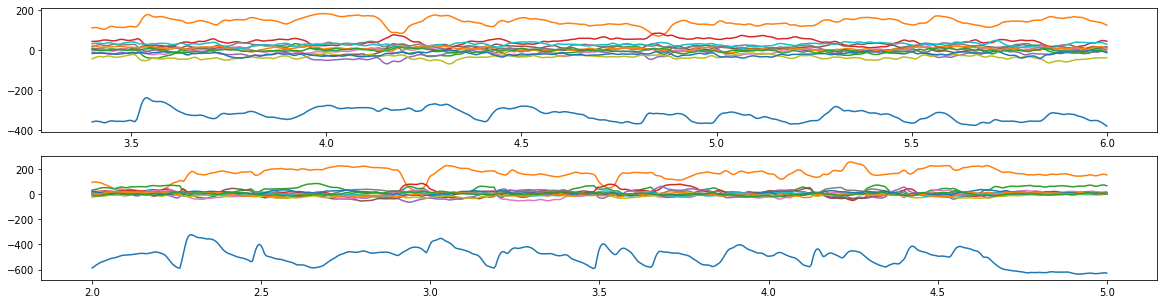

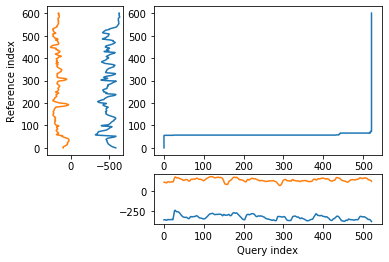

threshold 1:  336.6229
threshold 2:  570


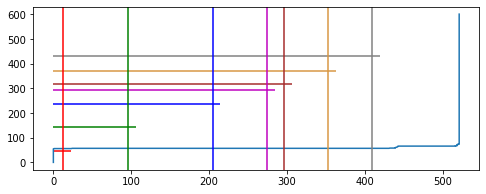

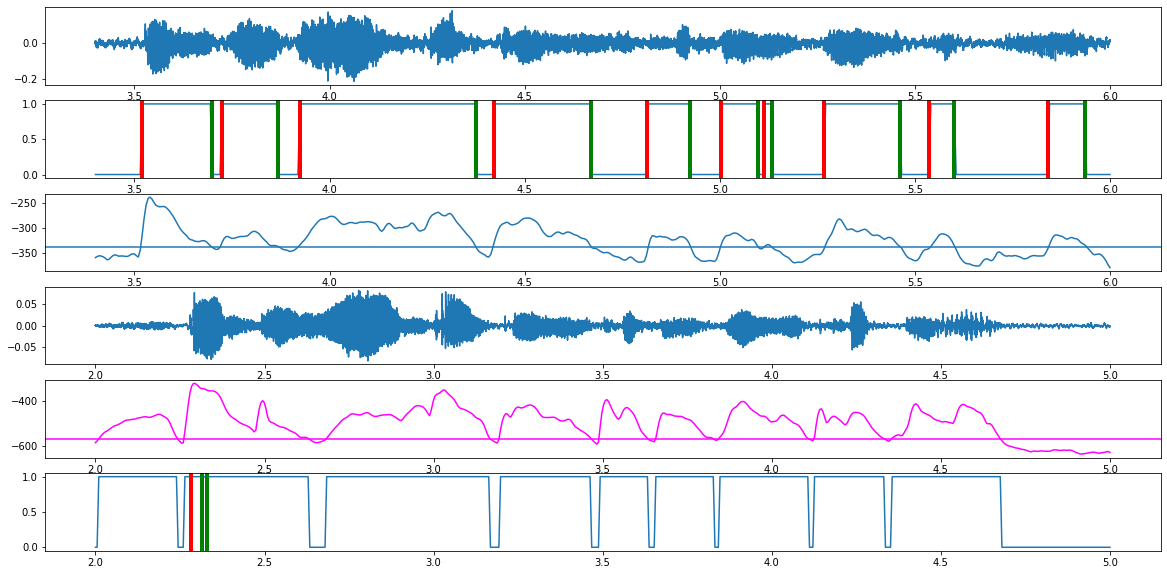

In [119]:
file1, seg1_1, seg1_2 = "01.wav", 3.4, 6
file2, seg2_1, seg2_2 = "01_2.wav", 2, 5

time1_lst = [3.46, 3.88, 4.42, 4.77, 4.88, 5.16, 5.44] ;
time2_lst = [2.24, 2.72, 3.18, 3.46, 3.59, 3.84, 4.16]

output(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, time1_lst = time1_lst, time2_lst = time2_lst, threshold2 = 570) 